Link to the dataset: https://drive.google.com/drive/folders/1H6MhJefZ7DlNZ_yhkIyaoennSQvyonRR?usp=sharing

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [ ]:
data_path = fr'/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image'
os.listdir(data_path)

['BearHead',
 'DeerHead',
 'CowHead',
 'DogHead',
 'CatHead',
 'ChickenHead',
 'MonkeyHead',
 'DuckHead',
 'ElephantHead',
 'HumanHead',
 'EagleHead',
 'LionHead',
 'MouseHead',
 'PandaHead',
 'Natural',
 'RabbitHead',
 'PigeonHead',
 'PigHead',
 'WolfHead',
 'SheepHead',
 'TigerHead']

In [ ]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


BearHead
DeerHead
ChickenHead
MonkeyHead
ElephantHead
EagleHead
PandaHead


In [ ]:
from collections import Counter
 
# data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
data = joblib.load(f'/content/animal_faces_80x80px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Bear': 101,
         'Deer': 101,
         'Chicken': 100,
         'Monkey': 100,
         'Elephant': 100,
         'Eagle': 97,
         'Panda': 117})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


bearfrontal0035.jpg
fallow-deer-2516.jpg
cattlefrontal0025.jpg
dog000573a.jpg
cat472a.jpg
chickenside0066.jpg
monkeyfrontal0016.jpg
duckside0015.jpg
0000000076.jpg
0000000089.jpg
040305-098..jpg
lionlu787.jpg
mousefrontal0064.jpg
pandafrontal0033.jpg
001015.jpg
rabbitfrontalfrontal0039.jpg
pigeon0000000010.jpg
pigfrontal0003.jpg
wolffrontal0069.jpg
sheepfrontal0084.jpg
tiger0000000066.jpg


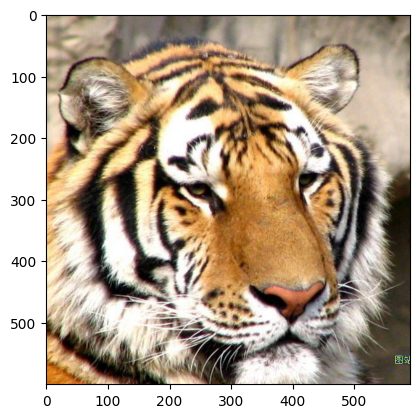

In [ ]:
# use np.unique to get all unique values in the list of labels

### YOUR CODE GOES HERE
labels = np.unique(data['label'])

# set up the matplotlib figure and axes, based on the number of labels

### YOUR CODE GOES HERE
fig,axes = plt.subplots()


 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case

### YOUR CODE GOES HERE
# for cl in os.listdir('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image'):
#     for i in os.listdir('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image/{}'.format(cl)):
#       im = plt.imread('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image/{}/{}'.format(cl,i))
#       axes.imshow(im)

for cl in os.listdir('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image'):
    # for i in os.listdir('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image/{}'.format(cl)):
    img = os.listdir('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image/{}'.format(cl))[0]
    print(img)
    im = plt.imread('/content/drive/MyDrive/CVIT_Orientation/demo/AnimalFace/Image/{}/{}'.format(cl,img))
    axes.imshow(im) 

In [ ]:
# get the data and labels from pickle object
### YOUR CODE GOES HERE
data = joblib.load(f'/content/animal_faces_80x80px.pkl')
print(np.unique(data['label']))
print(len(data['label']))
print(len(data['data']))

x = data['data']
y = data['label']

['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']
716
716


In [ ]:
#split the data into train and test set
### YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
print(len(x_train),len(y_train))
print(len(x_test), len(y_test))

501 501
215 215


In [ ]:
print(type(x_train))

<class 'list'>


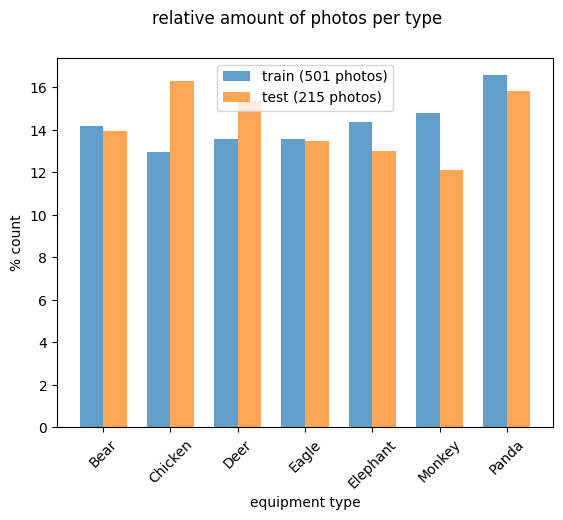

In [ ]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

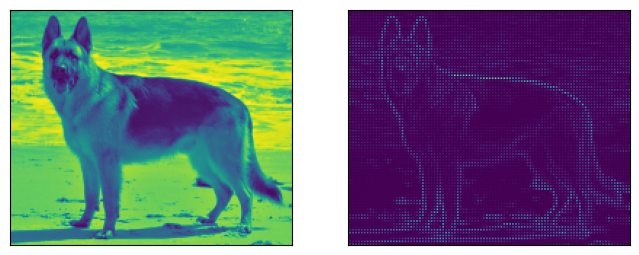

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread('/content/drive/MyDrive/CVIT_Orientation/demo/German_Shepherd.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')

# plt.imshow(dog,cmap='gray')
# calculate the hog and return a visual representation.
### YOUR CODE GOES HERE
fd, dog_hog = hog(dog, orientations=8, pixels_per_cell=(2,2), cells_per_block=(1, 1), visualize=True)
 
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in (ax1,ax2)]

# Create a subplot and plot original image and HOG image
### YOUR CODE GOES HERE
plt.subplot(1,2,1)
ax1.imshow(dog)

plt.subplot(1,2,2)
ax2.imshow(dog_hog)

In [ ]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  31428
number of hog features:  162


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
'''
call fit_transform on each transform converting X_train step by step first convert RGB2Gray, 
then calculate HOG features and finally scale the images
'''
### YOUR CODE GOES HERE
# for i in x_train:
g = grayify.transform(x_train)
hg = hogify.transform(g)
x_train_transformed = scalify.fit_transform(hg)
# hg = hogify.transform.local_hog(g)
# shg = scalify(hg)
print(g,hg,x_train_transformed)

[[[0.52687146 0.53329738 0.53419486 ... 0.51956784 0.52668606 0.53271067]
  [0.53099393 0.53500356 0.53309043 ... 0.53519038 0.53895895 0.53984127]
  [0.52587764 0.52726579 0.53306603 ... 0.53269943 0.53651222 0.53520254]
  ...
  [0.18856376 0.2013548  0.196885   ... 0.60010774 0.58364314 0.59239097]
  [0.17177336 0.24654884 0.23944862 ... 0.53611336 0.54114881 0.56208887]
  [0.17169023 0.21819814 0.20411561 ... 0.49635377 0.50724435 0.51592829]]

 [[0.56738745 0.56738745 0.56738745 ... 0.5595915  0.55954436 0.55954436]
  [0.56738745 0.56738745 0.56738745 ... 0.56089524 0.56086396 0.56086396]
  [0.56738745 0.56738745 0.56738745 ... 0.56434724 0.56435797 0.56435797]
  ...
  [0.15118524 0.14438653 0.12802146 ... 0.58307887 0.5830589  0.5830589 ]
  [0.13642521 0.11978664 0.10982924 ... 0.58568098 0.58566085 0.58566085]
  [0.11683941 0.09696998 0.08656731 ... 0.58903376 0.58901363 0.58901363]]

 [[0.36873314 0.36647824 0.36671031 ... 0.438496   0.43985997 0.44167798]
  [0.36873314 0.366478

In [ ]:
# initialise the SGD classifier/ any MLP classifier

### YOUR CODE GOES HERE
from sklearn.pipeline import make_pipeline
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x_train_transformed,y_train)

SGDClassifier()

In [ ]:
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])


In [ ]:
# Prepare test data by applying same transforms as train data

### YOUR CODE GOES HERE
g_test = grayify.transform(x_test)
hg_test = hogify.transform(g_test)
x_test_transformed = scalify.fit_transform(hg_test)

In [ ]:
# Print the testing accuracy

### YOUR CODE GOES HERE
clf.predict(x_test_transformed)

array(['Elephant', 'Eagle', 'Eagle', 'Monkey', 'Panda', 'Monkey',
       'Elephant', 'Bear', 'Panda', 'Elephant', 'Deer', 'Panda', 'Monkey',
       'Monkey', 'Eagle', 'Monkey', 'Elephant', 'Chicken', 'Deer',
       'Elephant', 'Bear', 'Eagle', 'Chicken', 'Deer', 'Deer', 'Panda',
       'Monkey', 'Eagle', 'Eagle', 'Chicken', 'Chicken', 'Deer', 'Monkey',
       'Eagle', 'Chicken', 'Panda', 'Monkey', 'Monkey', 'Elephant',
       'Panda', 'Chicken', 'Panda', 'Chicken', 'Elephant', 'Elephant',
       'Panda', 'Monkey', 'Chicken', 'Monkey', 'Monkey', 'Eagle', 'Panda',
       'Deer', 'Chicken', 'Bear', 'Monkey', 'Elephant', 'Chicken', 'Bear',
       'Panda', 'Monkey', 'Bear', 'Chicken', 'Panda', 'Elephant', 'Panda',
       'Panda', 'Chicken', 'Chicken', 'Deer', 'Monkey', 'Chicken',
       'Elephant', 'Bear', 'Panda', 'Panda', 'Panda', 'Deer', 'Monkey',
       'Bear', 'Bear', 'Deer', 'Bear', 'Deer', 'Chicken', 'Eagle',
       'Eagle', 'Deer', 'Deer', 'Bear', 'Monkey', 'Bear', 'Eagle', 'Deer',


In [ ]:
# Plot confusion matrix

### YOUR CODE GOES HERE


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

NameError: ignored